In [20]:
from __future__ import division, print_function
import matplotlib.pyplot as plt
import bilby
import numpy as np

import hphc13
import hphc11

C = 299792458.
G = 6.67408*1e-11
Mo = 1.989*1e30
Mpc = 3.086*1e22

%matplotlib inline

In [2]:
sampling_frequency = 1024.0
duration = 4.0

In [21]:
bilby.gw.waveform_generator.WaveformGenerator.

bilby.gw.waveform_generator.WaveformGenerator

In [3]:
def eccentric_waveform(frequency_array_, chirp_mass, mass_ratio, eccentricity, luminosity_distance, theta_jn, psi, phase, geocent_time, ra, dec):
    
    mass_1 = (chirp_mass*(1+mass_ratio)**(1/5))/mass_ratio**(3/5)
    mass_2 = chirp_mass*mass_ratio**(2/5)*(1+mass_ratio)**(1/5)
    luminosity_distance = luminosity_distance*Mpc
    total_mass = (mass_1+mass_2)*Mo
    symmetric_mass_ratio = (mass_1*mass_2)/((mass_1+mass_2)**2)
    maximum_f = (C**3)/( G*(mass_1+mass_2)*Mo*np.pi*6**(3/2) )
    minimum_f = 20.0
    mass_diff = (mass_1-mass_2)*Mo
    
    foo = np.array(frequency_array_)
    foo2 = foo[foo>=20.0]
    foo3 = foo[foo<20.0]
    foo4 = foo2[foo2<=maximum_f]
    foo5 = foo2[foo2>maximum_f]

    arg_plus = {'iota_':theta_jn, 'beta_':psi, 'D_':luminosity_distance , \
                'farray_':foo4, 'f0_':20.0, 'et0_':eccentricity, 'phic_':phase, \
                'tc_':geocent_time, 'M_':total_mass, 'eta_':symmetric_mass_ratio, \
                'ff_':maximum_f, 'delta_':mass_diff}

    fplus = hphc13.Fn(**arg_plus)

    h_plus = fplus.htilde()[0]
    h_cross = fplus.htilde()[1]

    h_plus = np.concatenate(( np.zeros(len(foo3)),h_plus,np.zeros(len(foo5)) ))
    h_cross = np.concatenate(( np.zeros(len(foo3)),h_cross,np.zeros(len(foo5)) ))
    return {'plus': h_plus, 'cross': h_cross}

In [4]:
injection_parameters = dict(chirp_mass=19.564163812778446, mass_ratio=0.9148936170212766, eccentricity=0.1, luminosity_distance=200.0, theta_jn=0.4, psi=0.1, phase=1.2, geocent_time=1180002601.0, ra=45.0, dec=5.73)

In [5]:
# Now we pass our source function to the WaveformGenerator
waveform_generator = bilby.gw.waveform_generator.WaveformGenerator(
    duration=duration, sampling_frequency=sampling_frequency,
    frequency_domain_source_model=eccentric_waveform)

13:06 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: __main__.eccentric_waveform
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


In [6]:
# Set up interferometers.
#maximum_f = (C**3)/( G*(mass_1+mass_2)*Mo*np.pi*6**(3/2) )
minimum_frequency = 20.0+3.0
MM1 = 25.0
MM2 = 25.0
maximum_frequency = (C**3)/( G*(MM1+MM2)*Mo*np.pi*6**(3/2) )-3.0

ifos = bilby.gw.detector.InterferometerList(['H1', 'L1'])
for ifo in ifos:
    ifo.minimum_frequency = minimum_frequency
    ifo.maximum_frequency = maximum_frequency
ifos.set_strain_data_from_power_spectral_densities(
    sampling_frequency=sampling_frequency, duration=duration,
    start_time=injection_parameters['geocent_time'] - 3)
ifos.inject_signal(waveform_generator=waveform_generator,
                   parameters=injection_parameters)

/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/bilby/gw/detector/psd.py:356: RuntimeWarning: invalid value encountered in multiply
  frequency_domain_strain = self.__power_spectral_density_interpolated(frequencies) ** 0.5 * white_noise
13:07 bilby INFO    : Injected signal in H1:
13:07 bilby INFO    :   optimal SNR = 85.84
13:07 bilby INFO    :   matched filter SNR = 86.45+1.27j
13:07 bilby INFO    :   chirp_mass = 19.564163812778446
13:07 bilby INFO    :   mass_ratio = 0.9148936170212766
13:07 bilby INFO    :   eccentricity = 0.1
13:07 bilby INFO    :   luminosity_distance = 200.0
13:07 bilby INFO    :   theta_jn = 0.4
13:07 bilby INFO    :   psi = 0.1
13:07 bilby INFO    :   phase = 1.2
13:07 bilby INFO    :   geocent_time = 1180002601.0
13:07 bilby INFO    :   ra = 45.0
13:07 bilby INFO    :   dec = 5.73
13:07 bilby INFO    : Injected signal in L1:
13:07 bilby INFO    :   optimal SNR = 50.48
13:07 bilby INFO    :   matched filter SNR = 51.15+1.88j
1

[{'plus': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]),
  'cross': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j])},
 {'plus': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]),
  'cross': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j])}]

13:07 bilby INFO    : Injected signal in H1:
13:07 bilby INFO    :   optimal SNR = 85.84
13:07 bilby INFO    :   matched filter SNR = 172.29+1.27j
13:07 bilby INFO    :   chirp_mass = 19.564163812778446
13:07 bilby INFO    :   mass_ratio = 0.9148936170212766
13:07 bilby INFO    :   eccentricity = 0.1
13:07 bilby INFO    :   luminosity_distance = 200.0
13:07 bilby INFO    :   theta_jn = 0.4
13:07 bilby INFO    :   psi = 0.1
13:07 bilby INFO    :   phase = 1.2
13:07 bilby INFO    :   geocent_time = 1180002601.0
13:07 bilby INFO    :   ra = 45.0
13:07 bilby INFO    :   dec = 5.73
13:07 bilby INFO    : Injected signal in L1:
13:07 bilby INFO    :   optimal SNR = 50.48
13:07 bilby INFO    :   matched filter SNR = 101.64+1.88j
13:07 bilby INFO    :   chirp_mass = 19.564163812778446
13:07 bilby INFO    :   mass_ratio = 0.9148936170212766
13:07 bilby INFO    :   eccentricity = 0.1
13:07 bilby INFO    :   luminosity_distance = 200.0
13:07 bilby INFO    :   theta_jn = 0.4
13:07 bilby INFO    :  

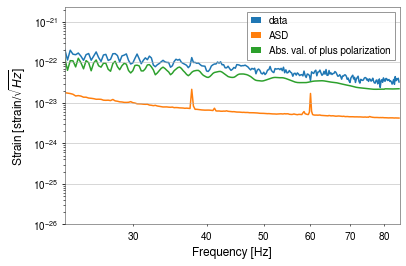

In [7]:
injection = ifos.inject_signal(waveform_generator=waveform_generator,
                   parameters=injection_parameters)

H1 = ifos[0]
H1_injection = injection[0]

fig, ax = plt.subplots()
idxs = H1.strain_data.frequency_mask  # This is a boolean mask of the frequencies which we'll use in the analysis
ax.loglog(H1.strain_data.frequency_array[idxs],
          np.abs(H1.strain_data.frequency_domain_strain[idxs]),
          label="data")
ax.loglog(H1.frequency_array[idxs],
          H1.amplitude_spectral_density_array[idxs],
          label="ASD")
ax.loglog(H1.frequency_array[idxs],
          np.abs(H1_injection["cross"][idxs]),
          label="Abs. val. of plus polarization")

ax.set_xlim(minimum_frequency,maximum_frequency)
ax.set_ylim(1e-26,2.327737159425905e-21)


ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("Strain [strain/$\sqrt{Hz}$]")
ax.legend()
plt.show()

In [16]:
#17.411011265922482,19.441935582935383,21.7637640824031
prior = bilby.core.prior.PriorDict()
prior['chirp_mass'] = 19.564163812778446
prior['mass_ratio'] = 0.9148936170212766
prior['eccentricity'] = bilby.core.prior.LogUniform(name='eccentricity', minimum=0.01, maximum=0.2)

prior["luminosity_distance"] = 200.0
prior["theta_jn"] = 0.4
prior["psi"] = 0.1
prior["phase"] = 1.2
prior["geocent_time"] = 1180002601.0
prior["ra"] = 45.0
prior["dec"] = 5.73

In [17]:
# Initialising the likelihood function.
likelihood = bilby.gw.likelihood.GravitationalWaveTransient(
    interferometers=ifos, waveform_generator=waveform_generator)

In [ ]:
result = bilby.run_sampler(
    likelihood=likelihood, priors=prior, sampler='dynesty', outdir='short', label="eccn",
    nlive=500, dlogz=3, npool=8)

16:30 bilby INFO    : Running for label 'eccn', output will be saved to 'short'
16:30 bilby INFO    : Using lal version 6.21.0
16:30 bilby INFO    : Using lal git version Branch: None;Tag: lal-v6.21.0;Id: 37caf89936b637993c30b3076fe4b853311873ee;;Builder: Adam Mercer <adam.mercer@ligo.org>;Repository status: CLEAN: All modifications committed
16:30 bilby INFO    : Using lalsimulation version 1.10.0
16:30 bilby INFO    : Using lalsimulation git version Branch: None;Tag: lalsimulation-v1.10.0;Id: 5bfe091197594d55cf634f8a1c004eb9dc9b6459;;Builder: Adam Mercer <adam.mercer@ligo.org>;Repository status: CLEAN: All modifications committed
16:30 bilby INFO    : Search parameters:
16:30 bilby INFO    :   eccentricity = LogUniform(minimum=0.01, maximum=0.2, name='eccentricity', latex_label='eccentricity', unit=None, boundary=None)
16:30 bilby INFO    :   chirp_mass = 19.564163812778446
16:30 bilby INFO    :   mass_ratio = 0.9148936170212766
16:30 bilby INFO    :   luminosity_distance = 200.0
16:

0it [00:00, ?it/s]

16:35 bilby INFO    : Using sampler Dynesty with kwargs {'bound': 'multi', 'sample': 'rwalk', 'verbose': True, 'periodic': None, 'reflective': None, 'check_point_delta_t': 600, 'nlive': 500, 'first_update': None, 'walks': 100, 'npdim': None, 'rstate': None, 'queue_size': 8, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': 1.5, 'bootstrap': None, 'vol_dec': 0.5, 'vol_check': 8.0, 'facc': 0.2, 'slices': 5, 'update_interval': 300, 'print_func': <bound method Dynesty._print_func of <bilby.core.sampler.dynesty.Dynesty object at 0x7fede9526a90>>, 'dlogz': 3, 'maxiter': None, 'maxcall': None, 'logl_max': inf, 'add_live': True, 'print_progress': True, 'save_bounds': False, 'n_effective': None, 'maxmcmc': 5000, 'nact': 5}
16:35 bilby INFO    : Checkpoint every check_point_delta_t = 600s
16:35 bilby INFO    : Using dynesty version 1.0.1
16:35 bilby INFO    : Generating initial points from the prior

In [14]:
ifos[1].time_domain_strain

array([4.97975103e-23, 5.73418099e-23, 6.19332888e-23, ...,
       2.81905297e-24, 2.28300467e-23, 3.84814859e-23])

In [19]:
ifos[1].strain_data.time_domain_ma

AttributeError: 'InterferometerStrainData' object has no attribute 'time_domain_mask'

In [ ]:
H1 = ifos[0]
H1_injection = injection[0]

fig, ax = plt.subplots()
idxs = H1.strain_data.frequency_mask  # This is a boolean mask of the frequencies which we'll use in the analysis
ax.loglog(H1.strain_data.frequency_array[idxs],
          np.abs(H1.strain_data.frequency_domain_strain[idxs]),
          label="data")